In [0]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 40.9MB/s 
     |████████████████████████████████| 3.9MB 35.1MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Succes

In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
import numpy as np
import keras
#from tensorflow.keras import Sequential
from tensorflow.python.keras import backend as K
#from keras.models import Sequential
from tensorflow.python.keras.layers import  Activation
#from keras.layers.core import Dense,Flatten
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications import vgg16
%matplotlib inline
print('lola')

lola


In [0]:
!unzip /test.zip 


Archive:  /test.zip
   creating: test/
   creating: test/Tomato_Early_blight/
  inflating: test/Tomato_Early_blight/b5183a61-b8c0-489e-8d38-46fa5e240d34___RS_Erly.B 9461.JPG  
  inflating: test/Tomato_Early_blight/a24d6927-cb21-4d9b-acc1-780ef36cbbf8___RS_Erly.B 7671.JPG  
  inflating: test/Tomato_Early_blight/de8d6c32-2b7c-4c2c-a974-9c1c9c30486e___RS_Erly.B 9560.JPG  
  inflating: test/Tomato_Early_blight/3205c4f9-9dd4-44ce-8e4c-0bd93405d60b___RS_Erly.B 6331.JPG  
  inflating: test/Tomato_Early_blight/cfe67544-6d8c-48e5-af01-51732c571cb5___RS_Erly.B 8291.JPG  
  inflating: test/Tomato_Early_blight/a8e1a7a4-d45d-4072-9c25-6f7685f8f08b___RS_Erly.B 9387.JPG  
  inflating: test/Tomato_Early_blight/8eba4e89-f5bf-45d4-be9b-30dfde83f538___RS_Erly.B 7586.JPG  
  inflating: test/Tomato_Early_blight/4fd3f0e7-cdd9-4151-8734-5f0ad1f52614___RS_Erly.B 9564.JPG  
  inflating: test/Tomato_Early_blight/16d79bd2-5c70-4e6b-a52a-0c578b501d04___RS_Erly.B 6446.JPG  
  inflating: test/Tomato_Early_blight/0e

In [0]:
!unzip /train.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/Tomato_Late_blight/7609a2a4-654e-4dad-b3e6-1cb4aab89420___RS_Late.B 5633.JPG  
  inflating: train/Tomato_Late_blight/16441ce5-dcfa-411c-8029-cef10b3f6474___GHLB2 Leaf 8687.JPG  
  inflating: train/Tomato_Late_blight/28e858c2-03ac-423c-8e0c-72e38a5634d9___GHLB_PS Leaf 2.2 Day 13.jpg  
  inflating: train/Tomato_Late_blight/4780f75c-a79a-47e6-89a0-7ecb5d18876e___RS_Late.B 5499.JPG  
  inflating: train/Tomato_Late_blight/8634f13d-ee5a-442e-8b58-6b667c91379c___GHLB2 Leaf 8968.JPG  
  inflating: train/Tomato_Late_blight/2164b3f8-102c-481c-9d89-7e2f6087a121___RS_Late.B 5065.JPG  
  inflating: train/Tomato_Late_blight/bf1dbfe2-cbad-428f-9d91-4a63de9121bd___RS_Late.B 5036.JPG  
  inflating: train/Tomato_Late_blight/e798b45b-9267-4cc7-a459-808f9944fd49___RS_Late.B 5003.JPG  
  inflating: train/Tomato_Late_blight/d0dceae1-6bf8-475a-99fa-f27accadece0___GHLB2 Leaf 8778.JPG  
  inflating: train/Tomato_Late_blight/e7619088-871f-422

In [0]:
train_path='/content/train'
test_path='/content/test'

In [0]:
train_batches = ImageDataGenerator().flow_from_directory(
    train_path,
    target_size=(224, 224),
    classes=[
        'Pepper__bell___Bacterial_spot',
        'Pepper__bell___healthy',
        'Potato___Early_blight',
        'Potato___healthy',
        'Potato___Late_blight',
        'Tomato_Bacterial_spot',
        'Tomato_Early_blight',
        'Tomato_healthy',
        'Tomato_Late_blight',
        'Tomato_Leaf_Mold',
        'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite',
        'Tomato__Target_Spot',
        'Tomato__Tomato_mosaic_virus',
        'Tomato__Tomato_YellowLeaf__Curl_Virus'
      ],
      batch_size=10
)


test_batches = ImageDataGenerator().flow_from_directory(
    test_path,
    target_size=(224, 224),
    classes=[
        'Pepper__bell___Bacterial_spot',
        'Pepper__bell___healthy',
        'Potato___Early_blight',
        'Potato___healthy',
        'Potato___Late_blight',
        'Tomato_Bacterial_spot',
        'Tomato_Early_blight',
        'Tomato_healthy',
        'Tomato_Late_blight',
        'Tomato_Leaf_Mold',
        'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite',
        'Tomato__Target_Spot',
        'Tomato__Tomato_mosaic_virus',
        'Tomato__Tomato_YellowLeaf__Curl_Virus'
      ],
      batch_size=70
)

Found 16582 images belonging to 15 classes.
Found 4056 images belonging to 15 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):

    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


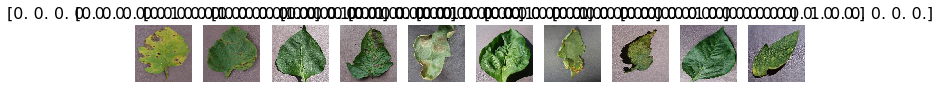

In [0]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

In [0]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(15, activation='softmax')
])



In [0]:


model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_8 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)                23656335  
Total params: 23,657,231
Trainable params: 23,657,231
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit_generator(train_batches, steps_per_epoch=28,epochs=5, verbose=2)


  ...
    to  
  ['...']
Train for 28 steps
Epoch 1/5
28/28 - 4s - loss: 10109.8819 - accuracy: 0.1214
Epoch 2/5
28/28 - 3s - loss: 173.6738 - accuracy: 0.2679
Epoch 3/5
28/28 - 3s - loss: 41.7676 - accuracy: 0.3143
Epoch 4/5
28/28 - 3s - loss: 23.6397 - accuracy: 0.2929
Epoch 5/5
28/28 - 3s - loss: 18.0468 - accuracy: 0.3786


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


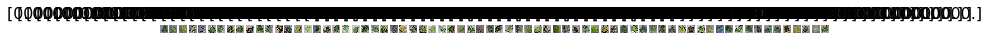

In [0]:
test_images, test_labels = next(test_batches)
plots(test_images, titles=test_labels)

In [0]:
test_labels.shape

(70, 15)

In [0]:


predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions.shape
predictions = predictions.round()



In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
prediction=predictions[:,0]
cm = confusion_matrix(test_labels, predictions[:,0])
def plot_confusion_matrix(cm,classes,normalize=False,
                          title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('confusion  matrix without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

ValueError: ignored

In [0]:
cm_plot_labels =['Pepper__bell___Bacterial_spot',
            'Pepper__bell___healthy',
            'Potato___Early_blight',
            'Potato___healthy',
            'Potato___Late_blight',
            'Tomato_Bacterial_spot',
            'Tomato_Early_blight',
            'Tomato_healthy',
            'Tomato_Late_blight',
            'Tomato_Leaf_Mold',
            'Tomato_Septoria_leaf_spot',
            'Tomato_Spider_mites_Two_spotted_spider_mite',
            'Tomato__Target_Spot',
            'Tomato__Tomato_mosaic_virus',
            'Tomato__Tomato_YellowLeaf__Curl_Virus']

plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

NameError: ignored

In [0]:
vgg16_model = vgg16.VGG16()




In [0]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:


vgg16_model.layers.pop



<function list.pop>

In [0]:


model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)



In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [0]:
model.compile(optimizer='Adam' ,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=28, epochs=5, verbose=2)

  ...
    to  
  ['...']
Train for 28 steps
Epoch 1/5
28/28 - 4s - loss: 2.6642 - accuracy: 0.1536
Epoch 2/5
28/28 - 4s - loss: 2.5812 - accuracy: 0.2500
Epoch 3/5
28/28 - 4s - loss: 2.5407 - accuracy: 0.2464
Epoch 4/5
28/28 - 4s - loss: 2.5426 - accuracy: 0.2286
Epoch 5/5
28/28 - 4s - loss: 2.5064 - accuracy: 0.3214


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


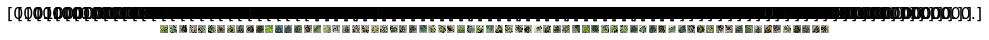

In [0]:


test_images, test_labels = next(test_batches)
plots(test_images, titles= test_labels)



In [0]:


test_labels = test_labels[:,0]
test_labels



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)


In [0]:
cm_plot_labels =['Pepper__bell___Bacterial_spot',
            'Pepper__bell___healthy',
            'Potato___Early_blight',
            'Potato___healthy',
            'Potato___Late_blight',
            'Tomato_Bacterial_spot',
            'Tomato_Early_blight',
            'Tomato_healthy',
            'Tomato_Late_blight',
            'Tomato_Leaf_Mold',
            'Tomato_Septoria_leaf_spot',
            'Tomato_Spider_mites_Two_spotted_spider_mite',
            'Tomato__Target_Spot',
            'Tomato__Tomato_mosaic_virus',
            'Tomato__Tomato_YellowLeaf__Curl_Virus']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

NameError: ignored

In [0]:
# -*- coding: utf-8 -*-
"""crop_disease_prediction.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/18rH8dIRlsaAXzyc6eOCPCD0zNSBywxFn
"""

from datetime import datetime
t1=datetime.now()
import tensorflow as tf

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import keras
#from tensorflow.keras import Sequential
from tensorflow.python.keras import backend as K
#from keras.models import Sequential
from tensorflow.python.keras.layers import  Activation
#from keras.layers.core import Dense,Flatten
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications import vgg16
# %matplotlib inline
print('lola')



train_path='/content/train'
test_path='/content/test'

train_batches = ImageDataGenerator().flow_from_directory(
    train_path,
    target_size=(224, 224),
    classes=[
        'Pepper__bell___Bacterial_spot',
        'Pepper__bell___healthy',
        'Potato___Early_blight',
        'Potato___healthy',
        'Potato___Late_blight',
        'Tomato_Bacterial_spot',
        'Tomato_Early_blight',
        'Tomato_healthy',
        'Tomato_Late_blight',
        'Tomato_Leaf_Mold',
        'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite',
        'Tomato__Target_Spot',
        'Tomato__Tomato_mosaic_virus',
        'Tomato__Tomato_YellowLeaf__Curl_Virus'
      ],
      batch_size=10
)


test_batches = ImageDataGenerator().flow_from_directory(
    test_path,
    target_size=(224, 224),
    classes=[
        'Pepper__bell___Bacterial_spot',
        'Pepper__bell___healthy',
        'Potato___Early_blight',
        'Potato___healthy',
        'Potato___Late_blight',
        'Tomato_Bacterial_spot',
        'Tomato_Early_blight',
        'Tomato_healthy',
        'Tomato_Late_blight',
        'Tomato_Leaf_Mold',
        'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite',
        'Tomato__Target_Spot',
        'Tomato__Tomato_mosaic_virus',
        'Tomato__Tomato_YellowLeaf__Curl_Virus'
      ],
      batch_size=70
)

# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):

    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

imgs, labels = next(train_batches)
plots(imgs, titles=labels)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(15, activation='softmax')
])

model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(train_batches, steps_per_epoch=28,epochs=5, verbose=2)

test_images, test_labels = next(test_batches)
plots(test_images, titles=test_labels)



predictions = model.predict_generator(test_batches, steps=1, verbose=0)

predictions = predictions.round()

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
prediction=predictions[:,0]


vgg16_model = vgg16.VGG16()

vgg16_model.summary()

vgg16_model.layers.pop

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

model.summary()

for layer in model.layers:
    layer.trainable = False

model.add(Dense(15,activation='softmax'))
model.summary()

model.compile(optimizer='Adam' ,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batches, steps_per_epoch=28, epochs=5, verbose=2)

test_images, test_labels = next(test_batches)
plots(test_images, titles= test_labels)

test_labels = test_labels[:,0]


predictions = model.predict_generator(test_batches, steps=1, verbose=0)

t2=datetime.now()

print(t2-t1)

lola
Found 16582 images belonging to 15 classes.
Found 4056 images belonging to 15 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_10 (Flatten)         (None, 1577088)           0         
_________________________________________________________________
dense_14 (Dense)             (None, 15)                23656335  
Total params: 23,657,231
Trainable params: 23,657,231
Non-trainable params: 0
_________________________________________________________________
  ...
    to  
  ['...']
Train for 28 steps
Epoch 1/5
28/28 - 4s - loss: 4971.2331 - accuracy: 0.1321
Epoch 2/5
28/28 - 3s - loss: 31.9735 - accuracy: 0.2571
Epoch 3/5
28/28 - 3s - loss: 14.8311 - accuracy: 0.2786
Epoch 4/5
28/28 - 3s - loss: 12.7943 - accuracy: 0.3714
Epoch 5/5
28/28 - 3s - loss: 14.0656 - accuracy: 0.4536


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
